# Example to use the open CAMEL Validation Skill Scores Library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import datetime
import scipy
import scipy.ndimage
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from camel import skillscores, dtw

# Read your data

Observations

In [3]:
Observations=pd.read_csv("examples/2008_Observations.txt", sep=",", skiprows=0, names=["Datetime", "B", "Speed", "Density", "Temperature"])

Predictions

In [4]:
Predictions=pd.read_csv("examples/2008_Euhforia.dat", sep="\s+", skiprows=2, names=["Year", "Month", "Day", "Hour", "Minute", "s", "ms", "Speed", "Density"])
Predictions["Datetime"] = pd.to_datetime(Predictions[["Year", "Month", "Day", "Hour", "Minute", "s"]])

# Application of various skillscore functions from skillscore.py

In [5]:
df_obs = Observations["Speed"][0:4465]
df_mod = Predictions["Speed"][0:4465]

# Convert the aforementioned series to np.arrays and then pandas.frames
df_mod_arr = df_mod.to_numpy()
df_obs_arr = df_obs.to_numpy()

df_obs = pd.DataFrame(df_obs_arr)
df_mod = pd.DataFrame(df_mod_arr)

RMS score

In [6]:
RMS_score = skillscores.rmsScore(df_mod, df_obs)

print ("The RMS score between obs and preds is: ", RMS_score)

########## Verification with python libraries ##########

rms = mean_squared_error(df_obs, df_mod, squared=False)

print ("The RMS score from python between obs and preds is: ", rms)

The RMS score between obs and preds is:  0    120.290696
dtype: float64
The RMS score from python between obs and preds is:  120.2906959031344


MAE Score

In [7]:
MAE_score = skillscores.maeScore(df_mod, df_obs)

print ("The MAE score between obs and preds is: ", MAE_score)

################### Verification with python libraries ##########

mae = mean_absolute_error(df_obs, df_mod)

print ("The MAE score from python between obs and preds is: ", mae)

The MAE score between obs and preds is:  0    96.319794
dtype: float64
The MAE score from python between obs and preds is:  96.31979373771642


Mean Square error

In [8]:
MSE_score = skillscores.meanSquaredError(df_mod, df_obs)

print ("The MSE score between obs and preds is: ", MSE_score)

The MSE score between obs and preds is:  0    14469.851521
dtype: float64


Correlation Coefficient

In [9]:
cc_score = skillscores.ccScore(df_mod, df_obs)
print ("Correlation coefficient between obs and preds is: ", cc_score)

Correlation coefficient between obs and preds is:  0    0.430814
dtype: float64


Bias

In [10]:
Bias = skillscores.bias(df_mod, df_obs, 10)

print ("The Bias between obs and preds is: ", Bias)

The Bias between obs and preds is:  0    1.0
dtype: float64


Helper function sigma and variance

In [11]:
sigma = skillscores.sigma(df_obs)
variance = skillscores.variance(df_obs)

print ("The sigma and variance of observations is: ", sigma, variance)

The sigma and variance of observations is:  0    116.315031
dtype: float64 0    13529.186519
dtype: float64


# Applying DTW as python package from camel/dtw.py

In [12]:
Sum_WINDvb=sum(df_mod_arr)
Length_WINDvb=len(df_obs_arr)
Average_WINDvb=Sum_WINDvb/Length_WINDvb

Average_WIND=[]
for i, value in enumerate(df_obs_arr):
    Average_WIND.append(Average_WINDvb)

print(len(Average_WIND))

4465


In [13]:
dtw_cost = dtw.calculate_dtw_cost(df_obs_arr, df_mod_arr)

print("The DTW cost is ", round(dtw_cost))

The DTW cost is  308109


In [14]:
dtw_cost_ref = dtw.calculate_dtw_cost_ref(df_obs_arr, Average_WIND)

print("The DTW cost ref is ", dtw_cost_ref)

The DTW cost ref is  467335.11177123716


In [15]:
SSF = dtw.SSF_SkillScore(dtw_cost, dtw_cost_ref)

print("The SSF skill score is ", SSF)

The SSF skill score is  0.6592901355460092


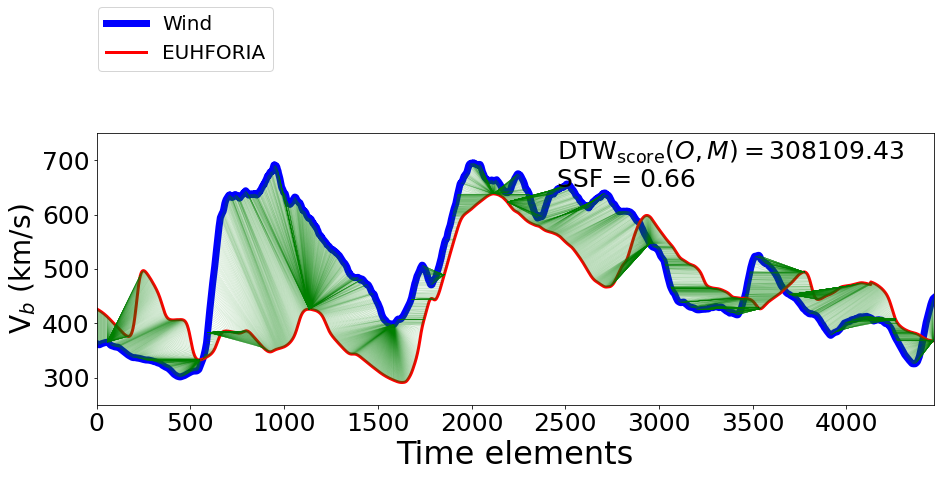

In [16]:
plot = dtw.plot_dtw(df_obs_arr, df_mod_arr, Average_WIND)